### **1. Data Understanding**

#### **a. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### **b. Load dataset**

In [2]:
# Load dataset
df = pd.read_csv('loan_data_2007_2014.csv')

# Tampilkan 5 baris pertama dari dataframe
df.head()

C:\Users\Maulana Andhika\AppData\Local\Temp\ipykernel_22704\3983929444.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **c. Identified Dataset Structure**

In [3]:
df.shape

(466285, 75)

Data terdiri dari 75 kolom dan 466285 baris

In [4]:
# Cek info awal data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### **d. Handle Missing Value**

In [5]:
# Cek kolom yang hanya berisi bais kosong
empty_columns = df.columns[df.isna().all()].tolist()

print("Kolom yang seluruh barisnya kosong:")
print(empty_columns)

Kolom yang seluruh barisnya kosong:
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [6]:
# Hapus kolom kosong
df.dropna(axis=1, how='all', inplace=True)
df.shape

(466285, 58)

Setelah menghapus kolom yang kosong kolom pada data berkurang menjadi 58

In [7]:
# Cek kolom kosong > 50%
cols_over_50_missing = df.columns[df.count() < df.shape[0] * 0.5].tolist()
print("Kolom dengan lebih dari 50% nilai kosong:")
print(cols_over_50_missing)

Kolom dengan lebih dari 50% nilai kosong:
['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']


In [8]:
# Hapus kolom dengan 50% lebih baris kosong
df.dropna(thresh = df.shape[0]*0.5 , axis=1 , inplace=True)
df.shape

(466285, 54)

Kini data hanya memiliki 54 kolom

##### **e. Create a New Column Credit Status Label**

In [9]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [10]:
df['status'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 
                                                        'Default', 
                                                        'Late (31-120 days)', 
                                                        'Late (16-30 days)',
                                                        'Does not meet the credit policy. Status:Charged Off'
                                                        ]), 
                            1, 0)


Jika pada kolom loan_status terdapat 'Charged Off, 'default,
'Late (31-120 days)', 'Late (16-30 days)', atau 
'Does not meet the credit policy. Status:Charged Off' maka status credit BAD(1) jika tidak ada maka status credit GOOD(0)

In [11]:
df['status'].value_counts()

status
0    414099
1     52186
Name: count, dtype: int64

#### **2. EDA**

#### **a. Descriptive Statistics** 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [13]:
# Drop kolo yang tidak relevan dengan Status Kredit
df.drop(columns=['Unnamed: 0', 'id', 'member_id', 'policy_code', 'emp_title', 'url', 'title', 
                 'zip_code', 'addr_state', 'loan_status', 'application_type'],inplace=True)     

In [14]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,status
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05,466285.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,11.187069,...,0.650129,85.344211,8.961534,3123.913796,0.009085,0.004002,1.919135e+02,1.388017e+05,3.037909e+04,0.111919
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,4.987526,...,5.265730,552.216084,85.491437,5554.737393,0.108648,0.068637,1.463021e+04,1.521147e+05,3.724713e+04,0.315267
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,312.620000,0.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,545.960000,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,3187.510000,0.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,...,358.680000,33520.270000,7002.190000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [16]:
# Mengelompokkan kolom yang seharusnya memiliki tipe data datetime
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',
            'last_credit_pull_d']
print("Kolom tanggal:", date_cols)

Kolom tanggal: ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [17]:
# Merubah col_date menjadi tipe data 'datetime'
for col in date_cols :
    df[col] = pd.to_datetime(df[col], format='%b-%y')

df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   issue_d             466285 non-null  datetime64[ns]
 1   earliest_cr_line    466256 non-null  datetime64[ns]
 2   last_pymnt_d        465909 non-null  datetime64[ns]
 3   next_pymnt_d        239071 non-null  datetime64[ns]
 4   last_credit_pull_d  466243 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 17.8 MB


In [18]:
# Membagi data menjadi kategorikal dan numerikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

print("Kolom kategorikal:", categorical_cols)
print("Kolom numerikal:", numerical_cols)

Kolom kategorikal: Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'],
      dtype='object')
Kolom numerikal: Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'status'],
      dtype='object')


##### **b. Handling Missing Value**

In [19]:
# Mengisi nilai yang hilang pada kolom kategorikal dengan nilai modusnya
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_length           466285 non-null  object
 4   home_ownership       466285 non-null  object
 5   verification_status  466285 non-null  object
 6   pymnt_plan           466285 non-null  object
 7   purpose              466285 non-null  object
 8   initial_list_status  466285 non-null  object
dtypes: object(9)
memory usage: 32.0+ MB


In [20]:
# Mengisi nilai yang hilang pada kolom numerik dengan nilai mediannya
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
    
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_length           466285 non-null  object
 4   home_ownership       466285 non-null  object
 5   verification_status  466285 non-null  object
 6   pymnt_plan           466285 non-null  object
 7   purpose              466285 non-null  object
 8   initial_list_status  466285 non-null  object
dtypes: object(9)
memory usage: 32.0+ MB


In [21]:
# Mengisi nilai yang hilang pada kolom datetime dengan nilai modusnya
for col in date_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 466285 non-null  object
 1   grade                466285 non-null  object
 2   sub_grade            466285 non-null  object
 3   emp_length           466285 non-null  object
 4   home_ownership       466285 non-null  object
 5   verification_status  466285 non-null  object
 6   pymnt_plan           466285 non-null  object
 7   purpose              466285 non-null  object
 8   initial_list_status  466285 non-null  object
dtypes: object(9)
memory usage: 32.0+ MB


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   funded_amnt                 466285 non-null  int64         
 2   funded_amnt_inv             466285 non-null  float64       
 3   term                        466285 non-null  object        
 4   int_rate                    466285 non-null  float64       
 5   installment                 466285 non-null  float64       
 6   grade                       466285 non-null  object        
 7   sub_grade                   466285 non-null  object        
 8   emp_length                  466285 non-null  object        
 9   home_ownership              466285 non-null  object        
 10  annual_inc                  466285 non-null  float64       
 11  verification_status         466285 non-

Terlihat tidak ada lagi nilai yang hilang pada setiap kolom

#### **c. Univariate Analysis**

##### **Categorical column**

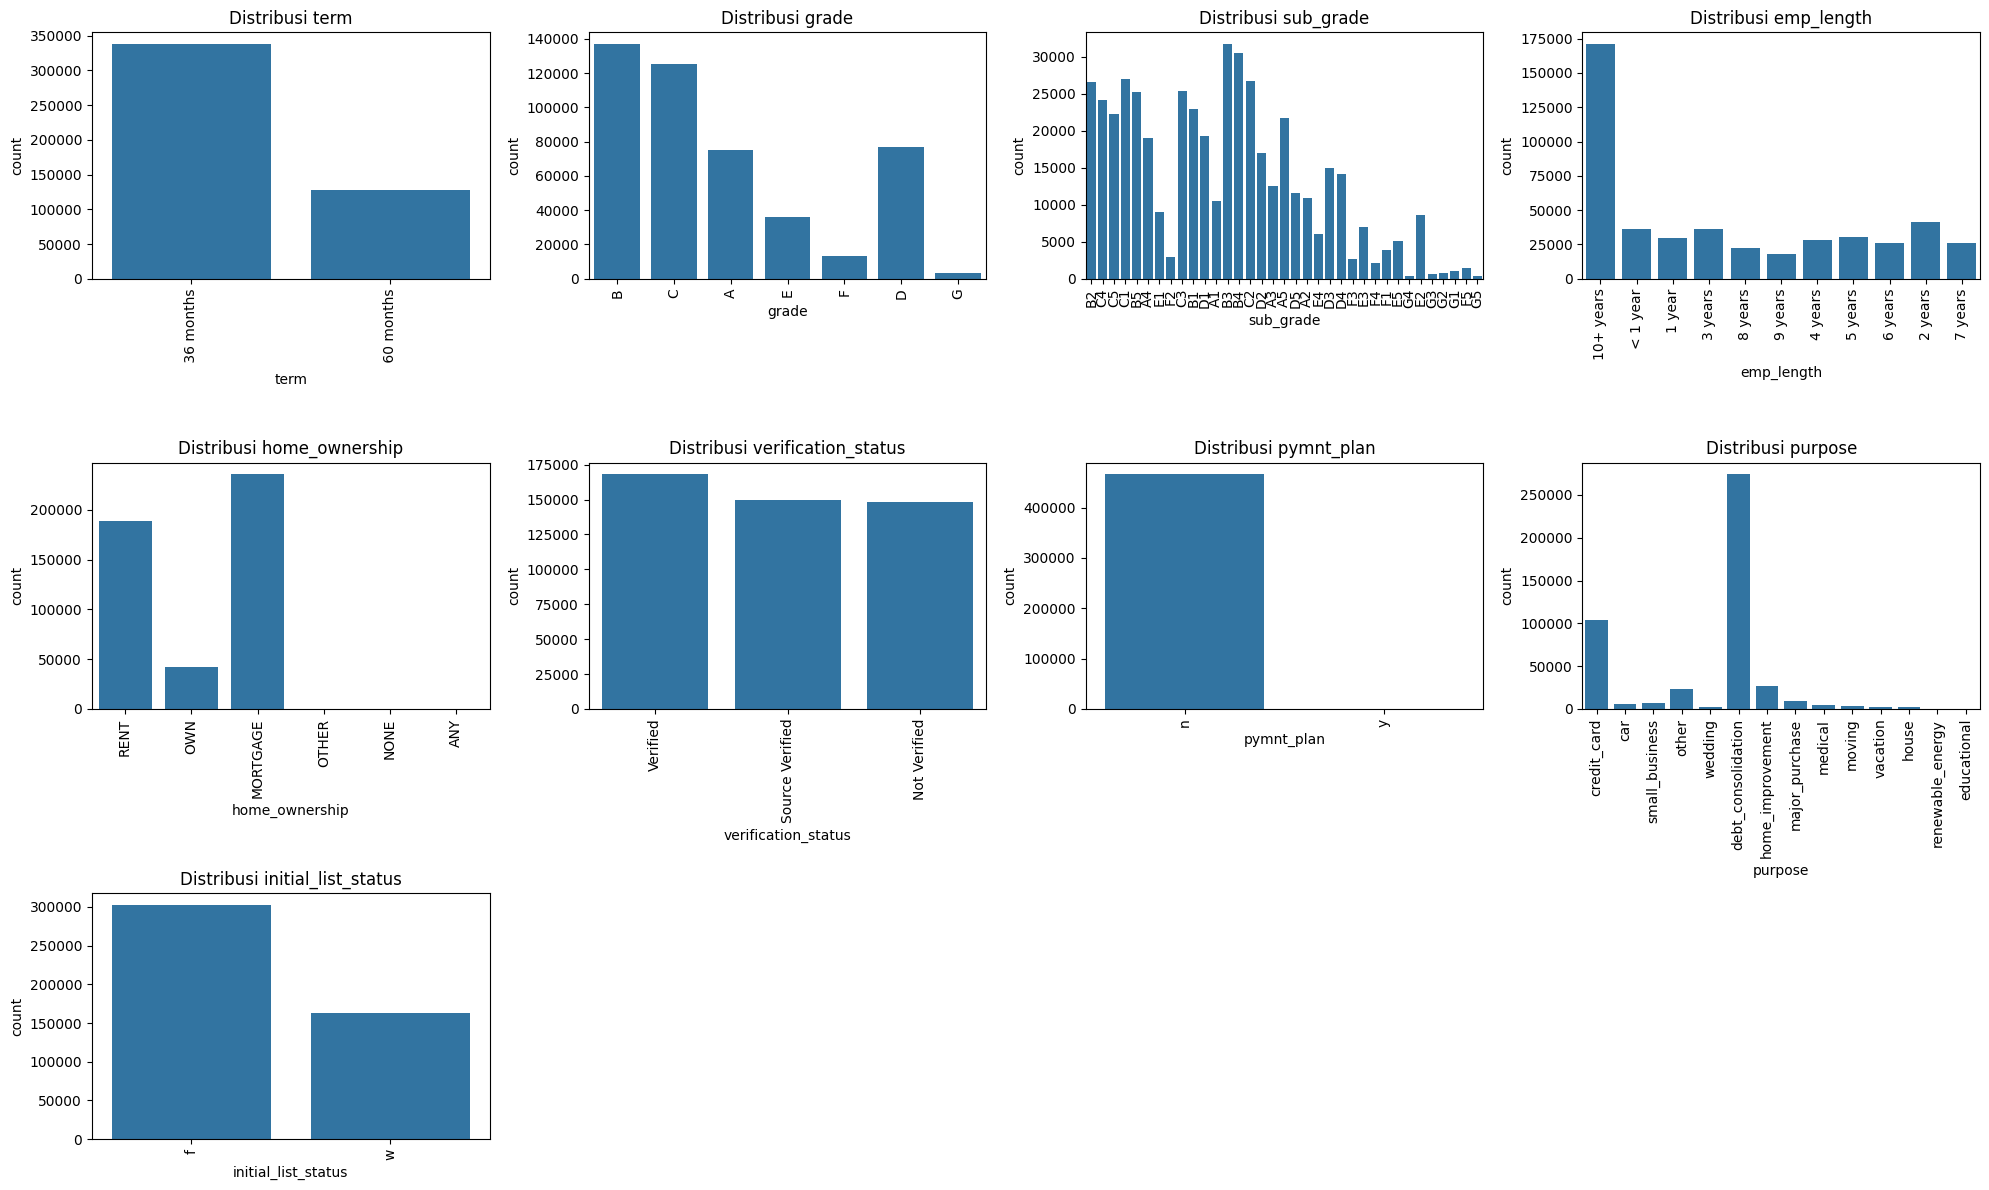

In [23]:
num_var_cat = len(categorical_cols)
n_cols = 4
n_rows =  -(-num_var_cat // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Kolom 'term' didominasi dengan jangka waktu peminjaman 36 bulan dibanding dengan jangka waktu peminjaan 60 bulan.
- Kolom 'grade' mayoritas diisi dengan grade B dan C dengan nilai yang hampir sama.
- Kolom 'emp_length' lebih banyak peminjam yang sudah bekerja lebih dari 10 tahun.
- Kolom 'home_ownership' mayoritas berisi 'mortage'
- Kolom 'verification_status' berisi distribusi yang hampir seimbang dengan verified memiliki jumlah paling banyak
- Kolom 'payment_plant' hampir semuanya berisi label n
- Kolom 'purpose' didominasi oleh debt consolidation
- Kolom 'initial_list_status' mayoritas berisi label f

##### **Numerical column**

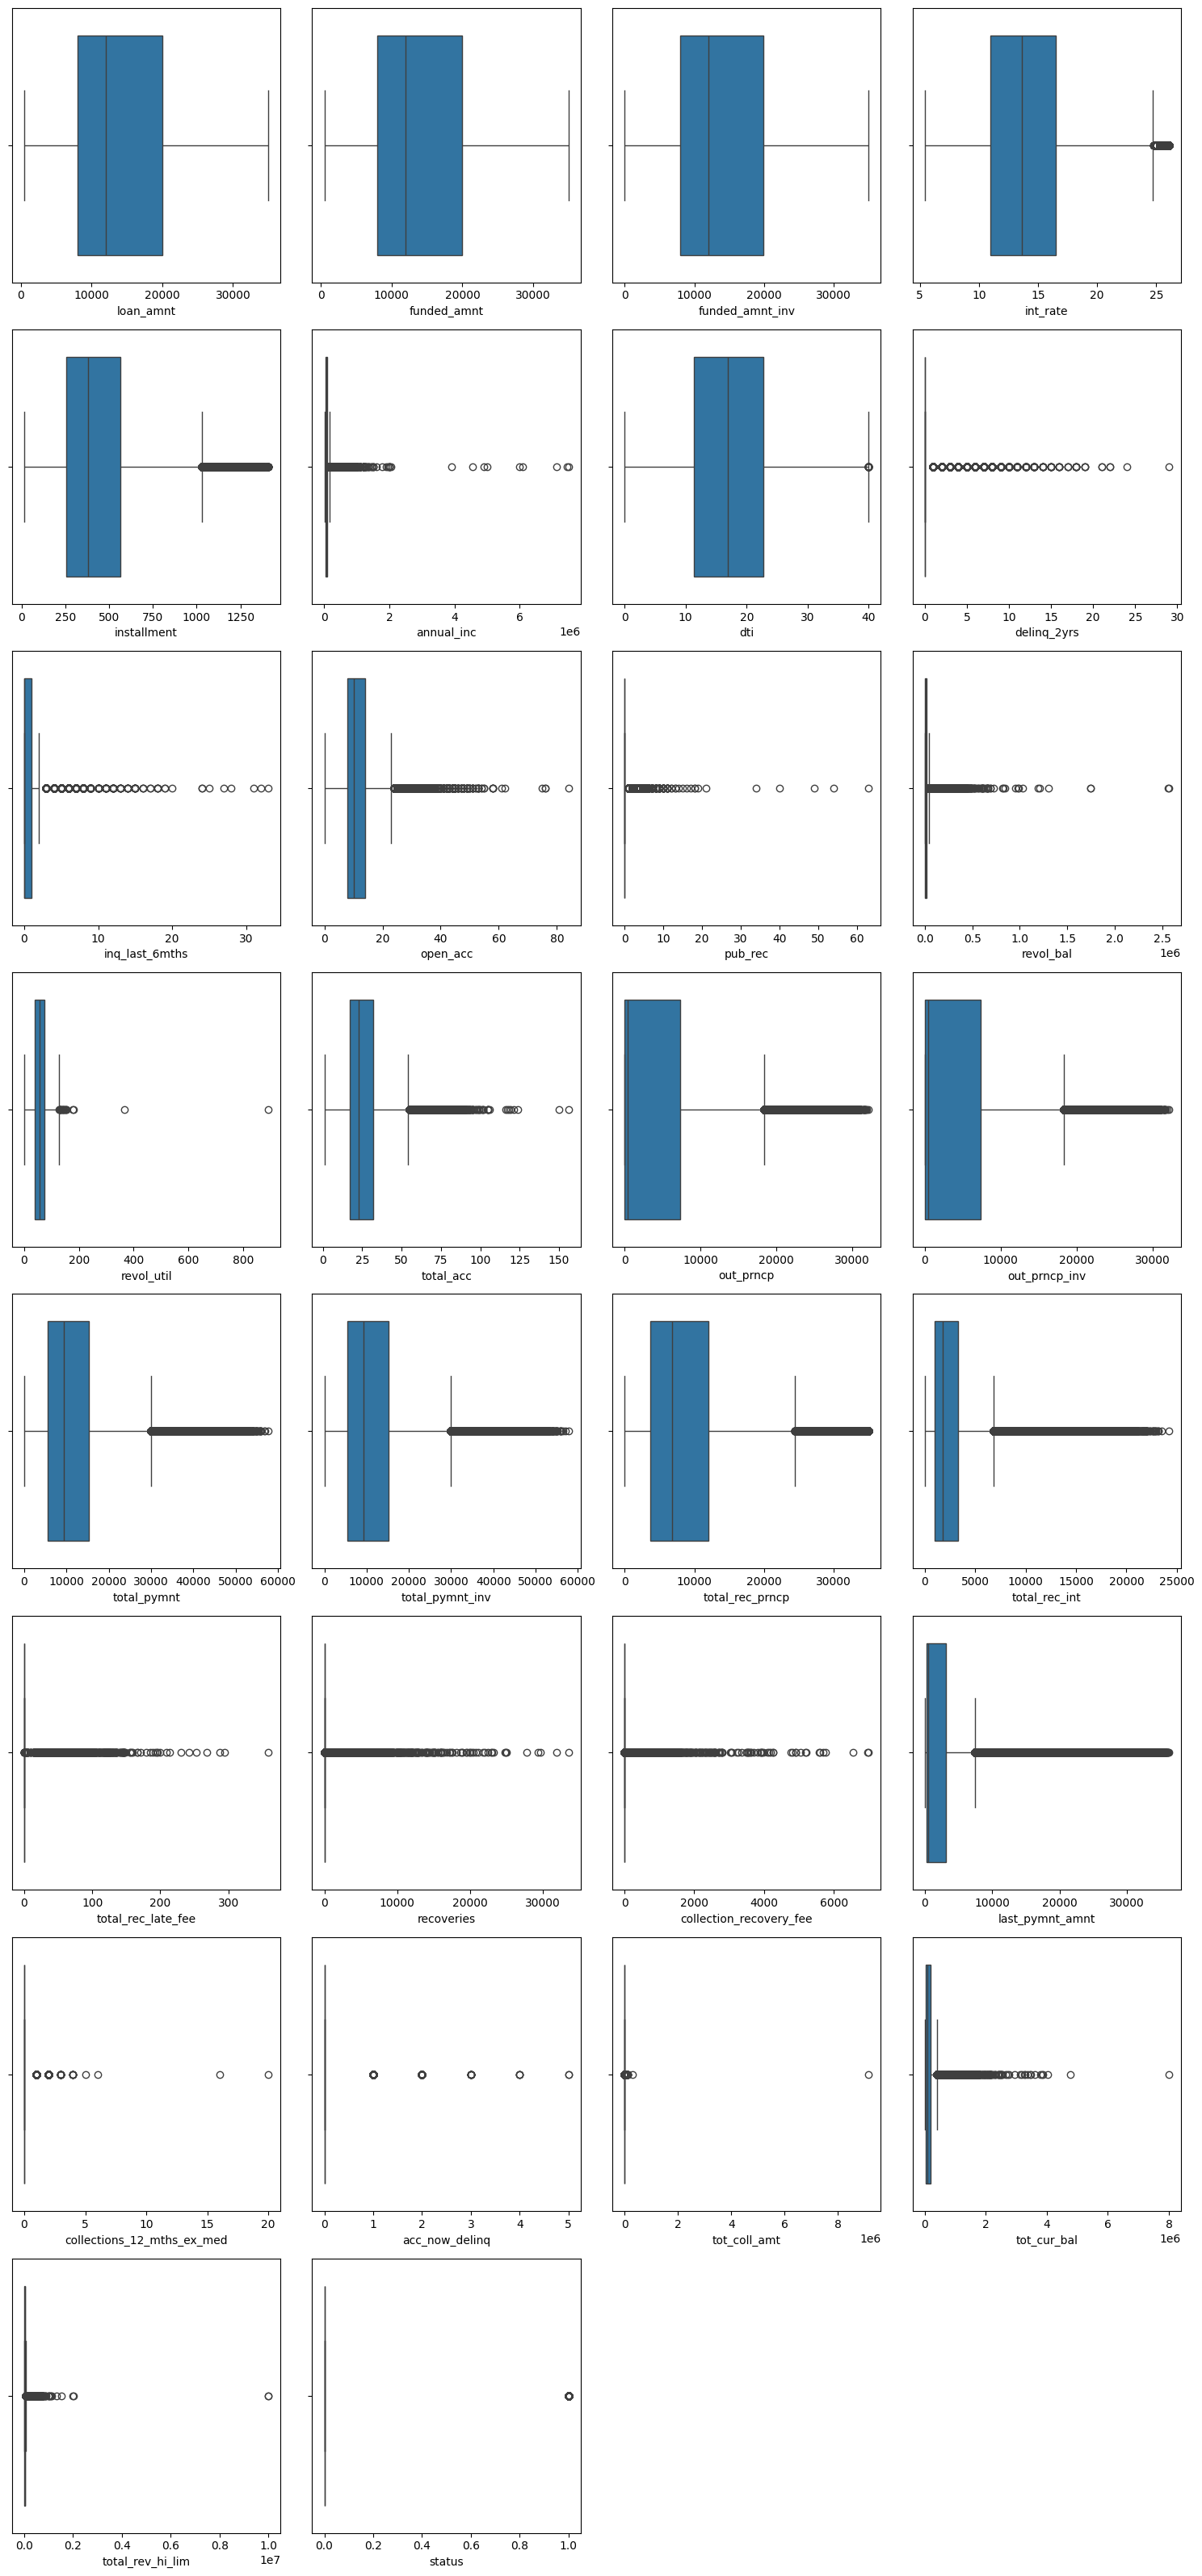

In [24]:
num_var_num = len(numerical_cols)
n_cols = 4
n_rows = -(-num_var_num // n_cols)

plt.figure(figsize=(15, n_rows * 4)) 

for i in range(num_var_num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[numerical_cols[i]])
    plt.xlabel(numerical_cols[i])

plt.tight_layout()
plt.show()

- Dataset cenderung memiliki banyak outlier pada bagian kanan (skewed kanan) yang nantinya perlu ditangani. 

##### **Date column**

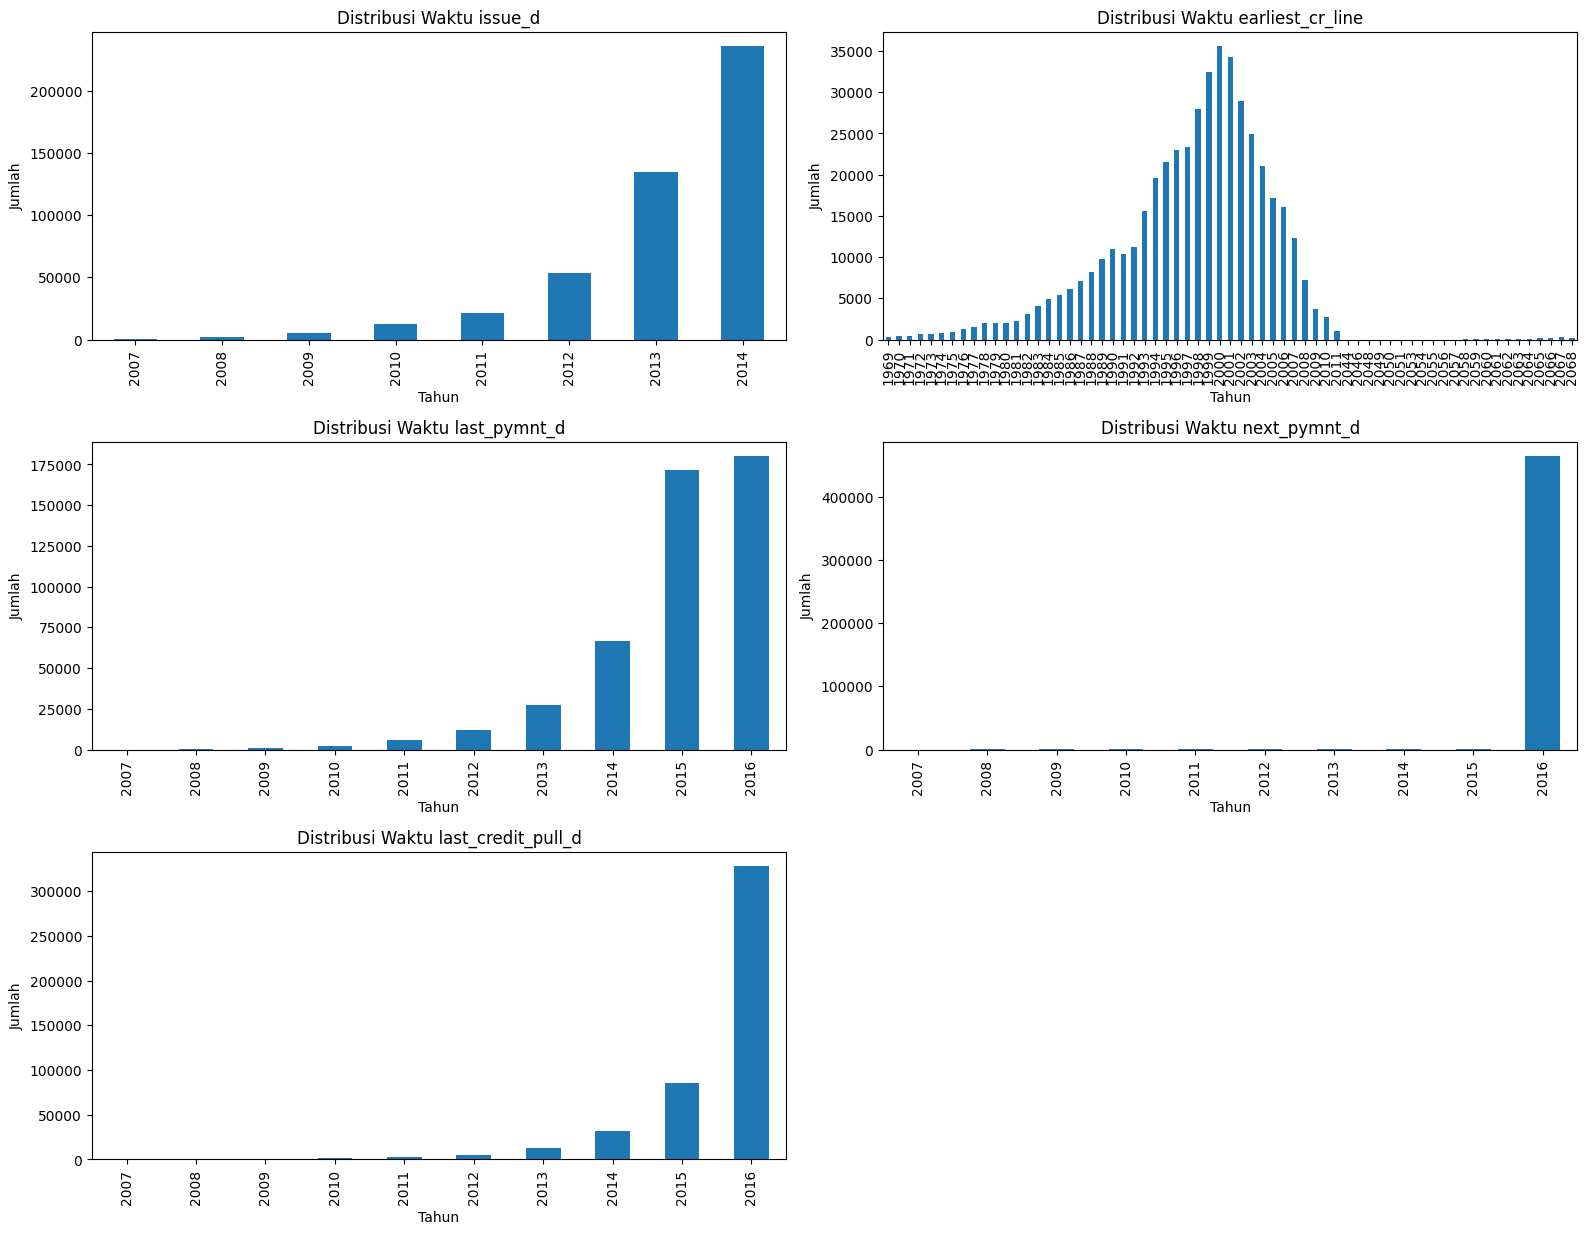

In [25]:
num_var_date = len(df[date_cols])
n_cols = 2
n_rows =  -(-num_var_cat // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(date_cols):
    df[col].dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi Waktu {col}')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Setiap tahunnya cenderung mengalami kenaikan pada kolom datetime

#### **d. Bivariate analysis**

##### **Categorical column**

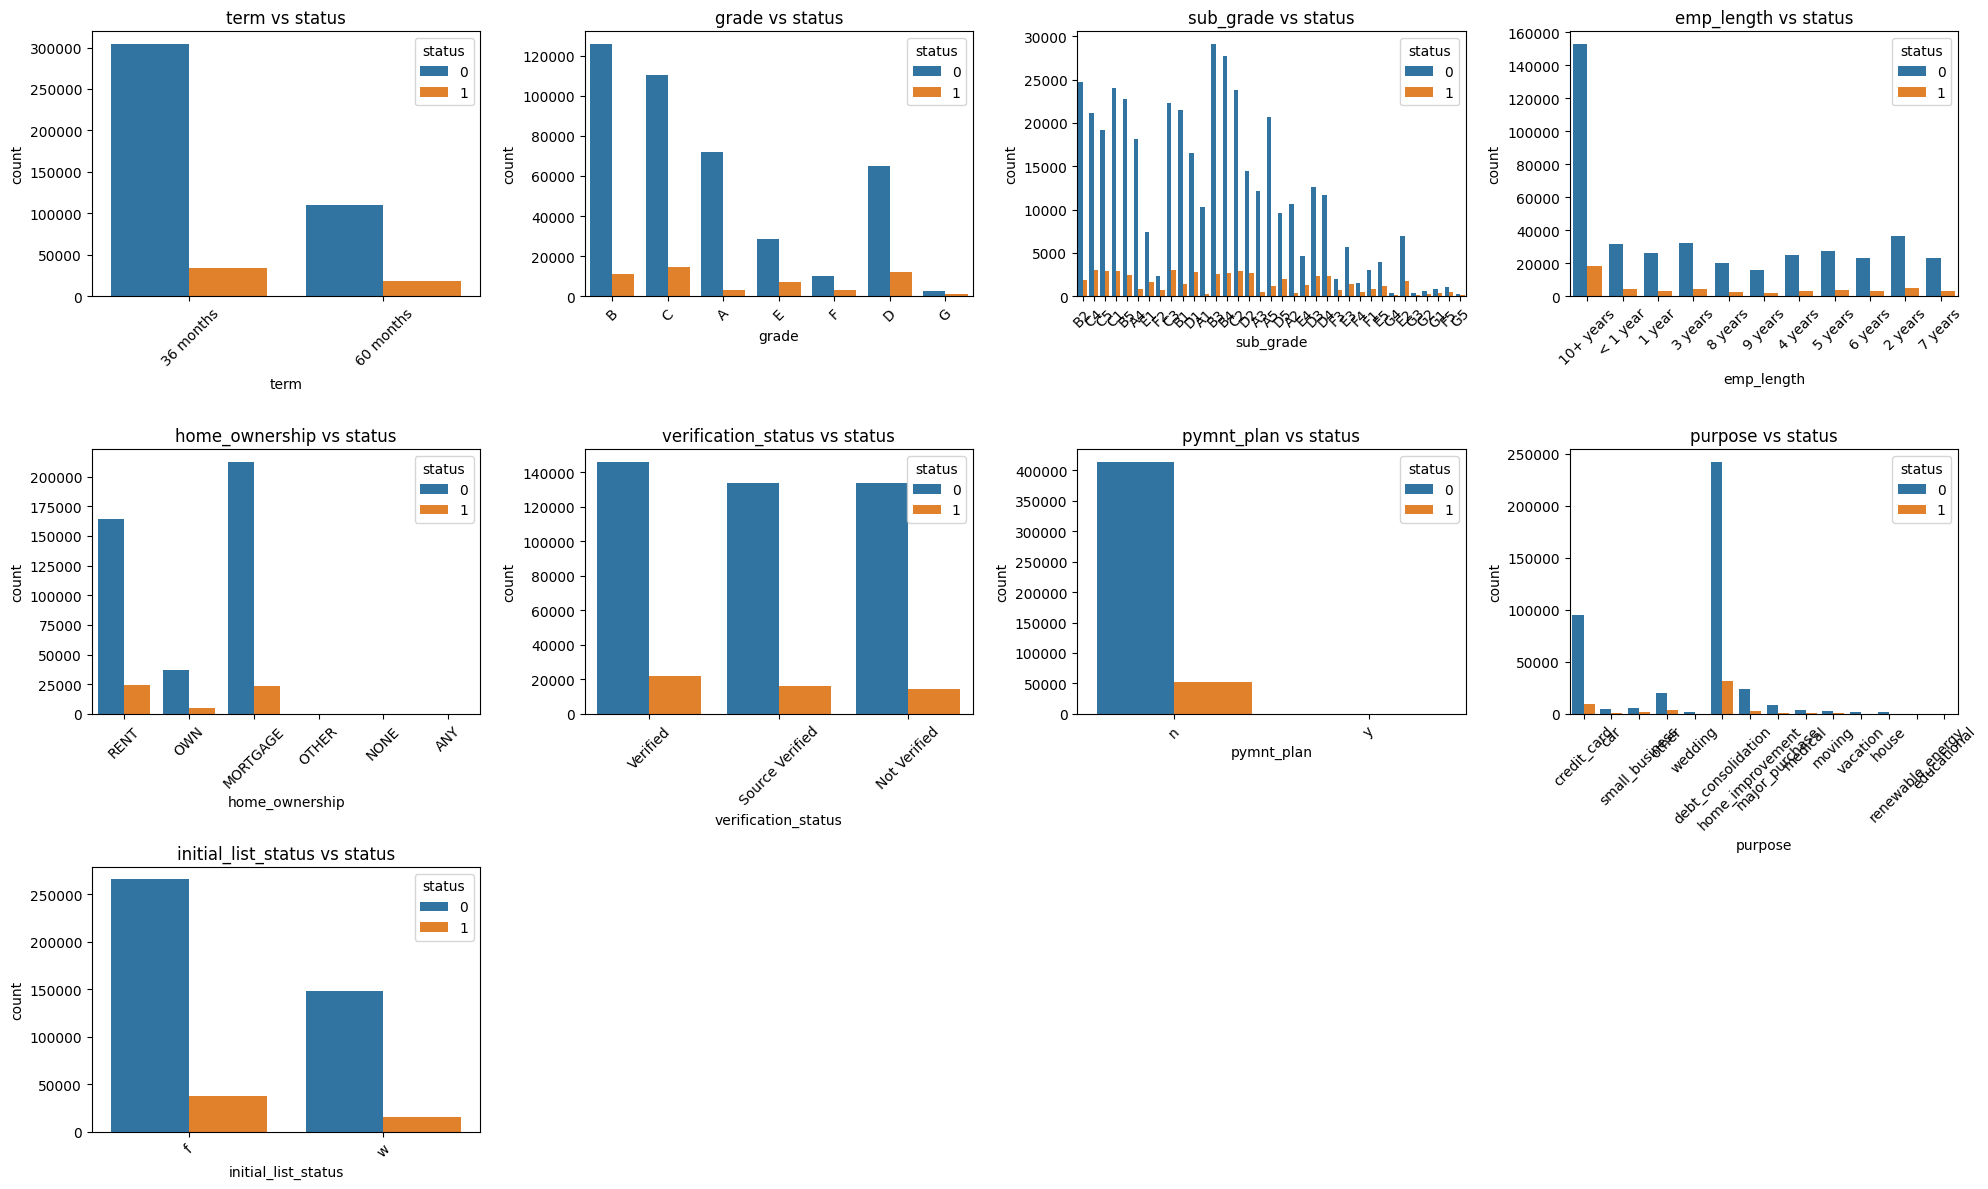

In [26]:
n_cols = 4
n_rows =  -(-num_var_cat // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="status", data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs status')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Status kredit yang GOOD didominasi dengan tenor peminjaman 36 bulan, grade peminjaman B atau C, mayoritas telah bekerja lebih dari 10 tahun, kepemilikan rumah masih kredit, dan tujuan peminjaman untuk debt consolidation.
- Sedangkan status kredit yang BAD kebanyakan meminjam dengan tenor 36 bulan, semakin jelek gradenya presentase statusnya semakin besar, telah bekerja lebih dari 10 tahun, kepemilikan rumah juga masih kredit, dan tujuan peminjaman untuk debt consolidation.  

##### **Numerical column**

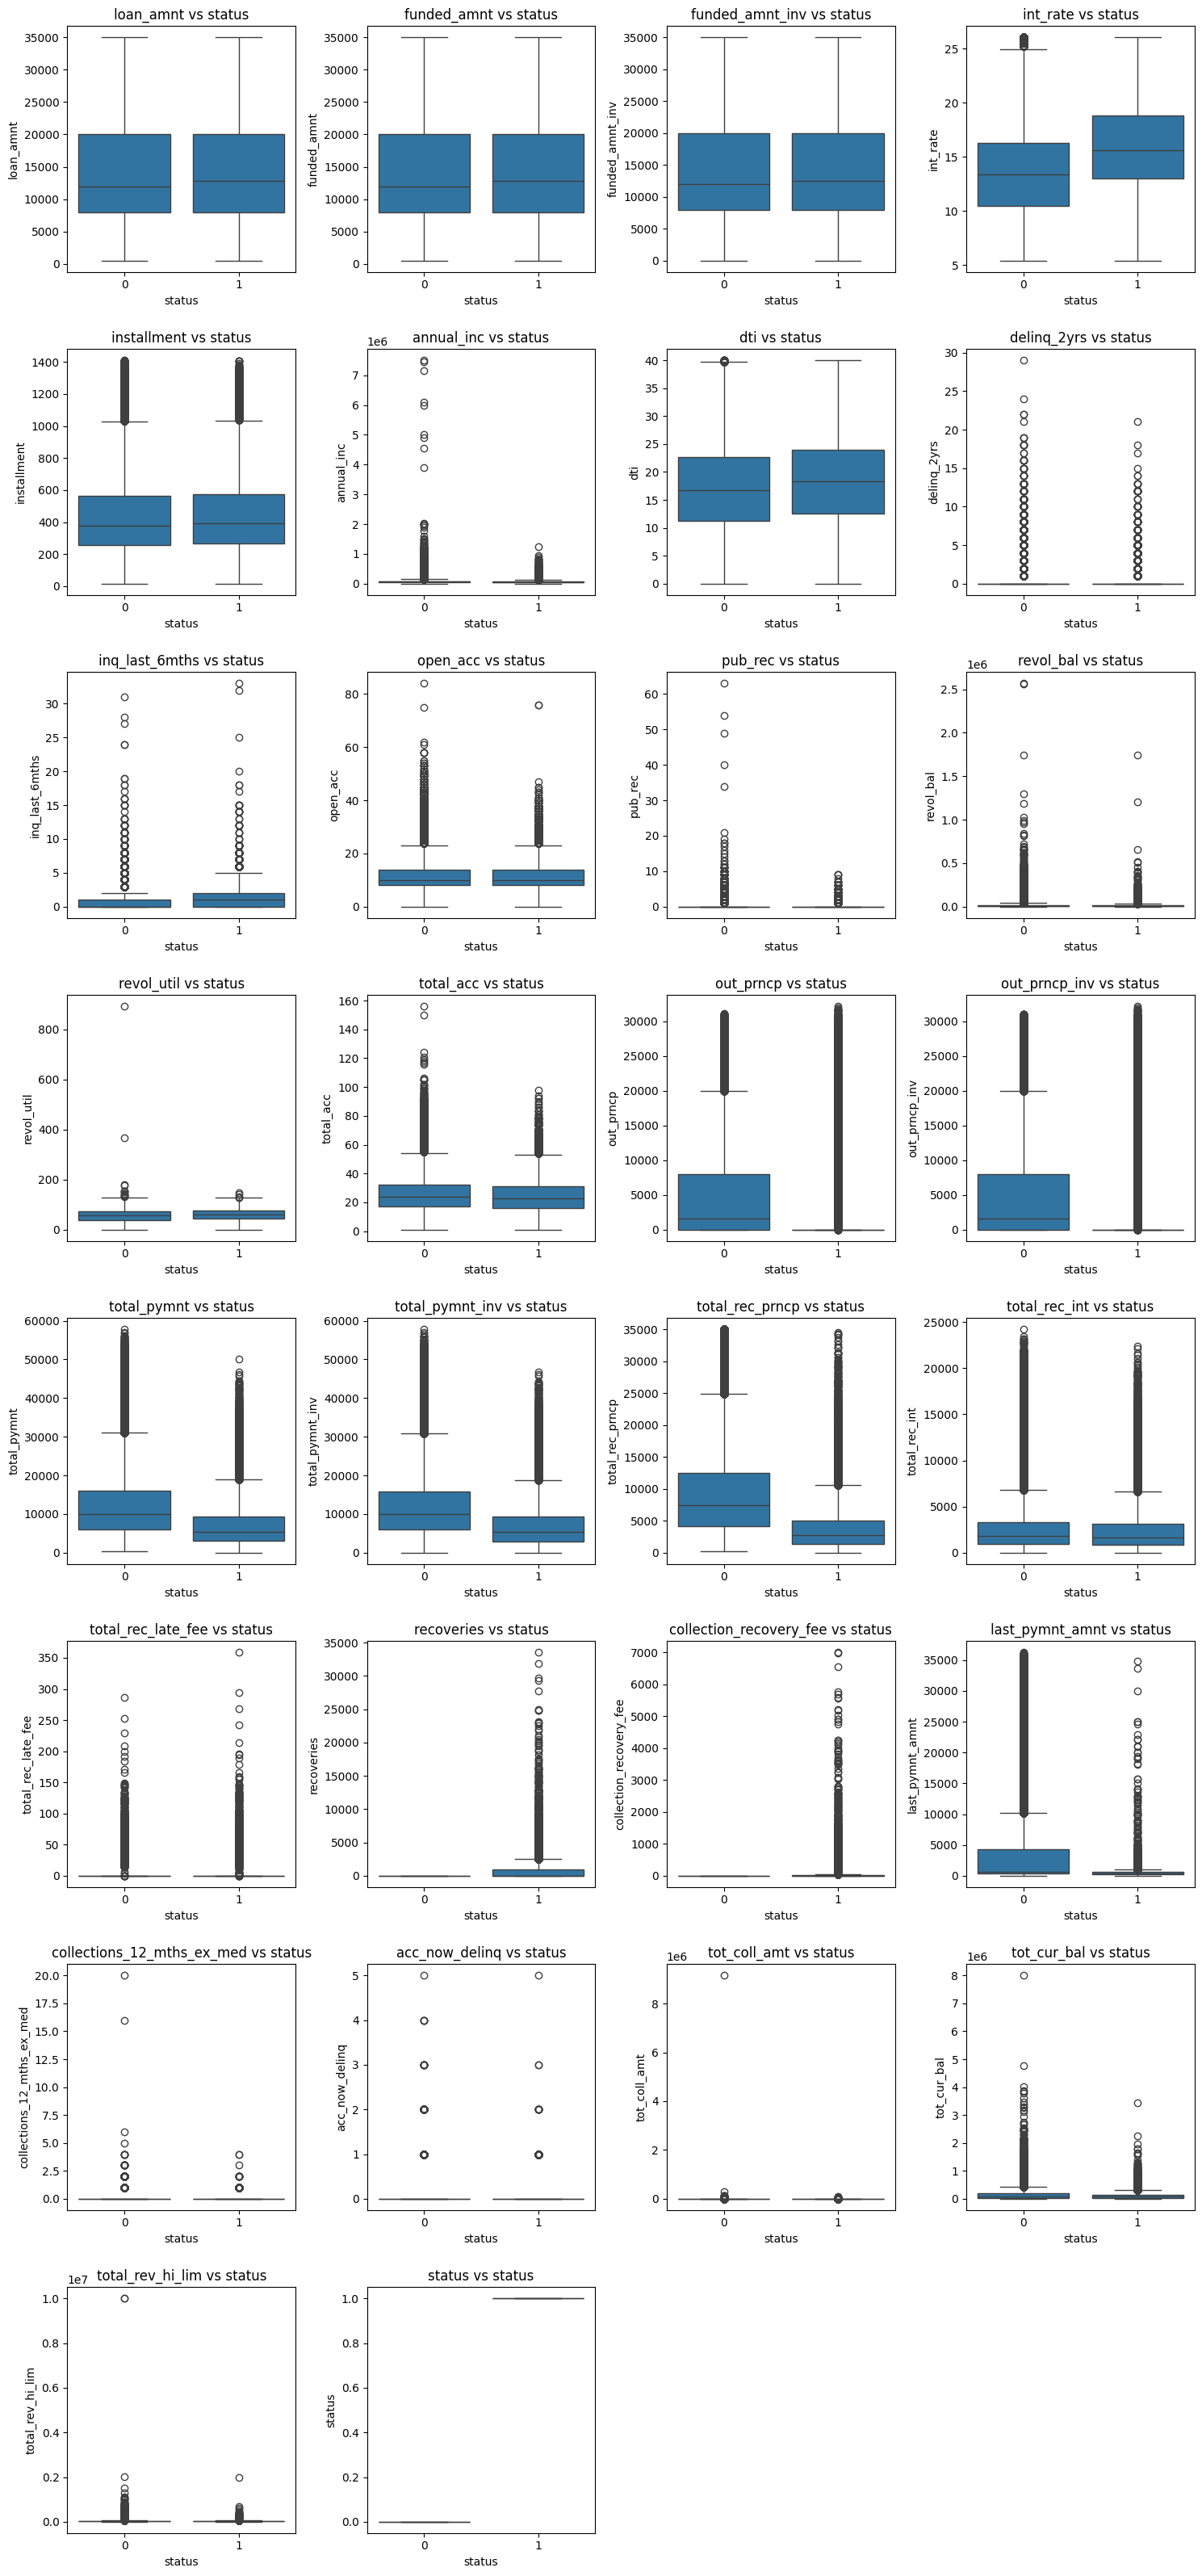

In [27]:
n_cols = 4
n_rows =  -(-num_var_num // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15 , 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='status', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs status')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Status kredit BAD cenderung memiliki annual income, total payment yang cenderung rendah. Sedangkan biaya keterlambatannya tinggi

##### **Date column**

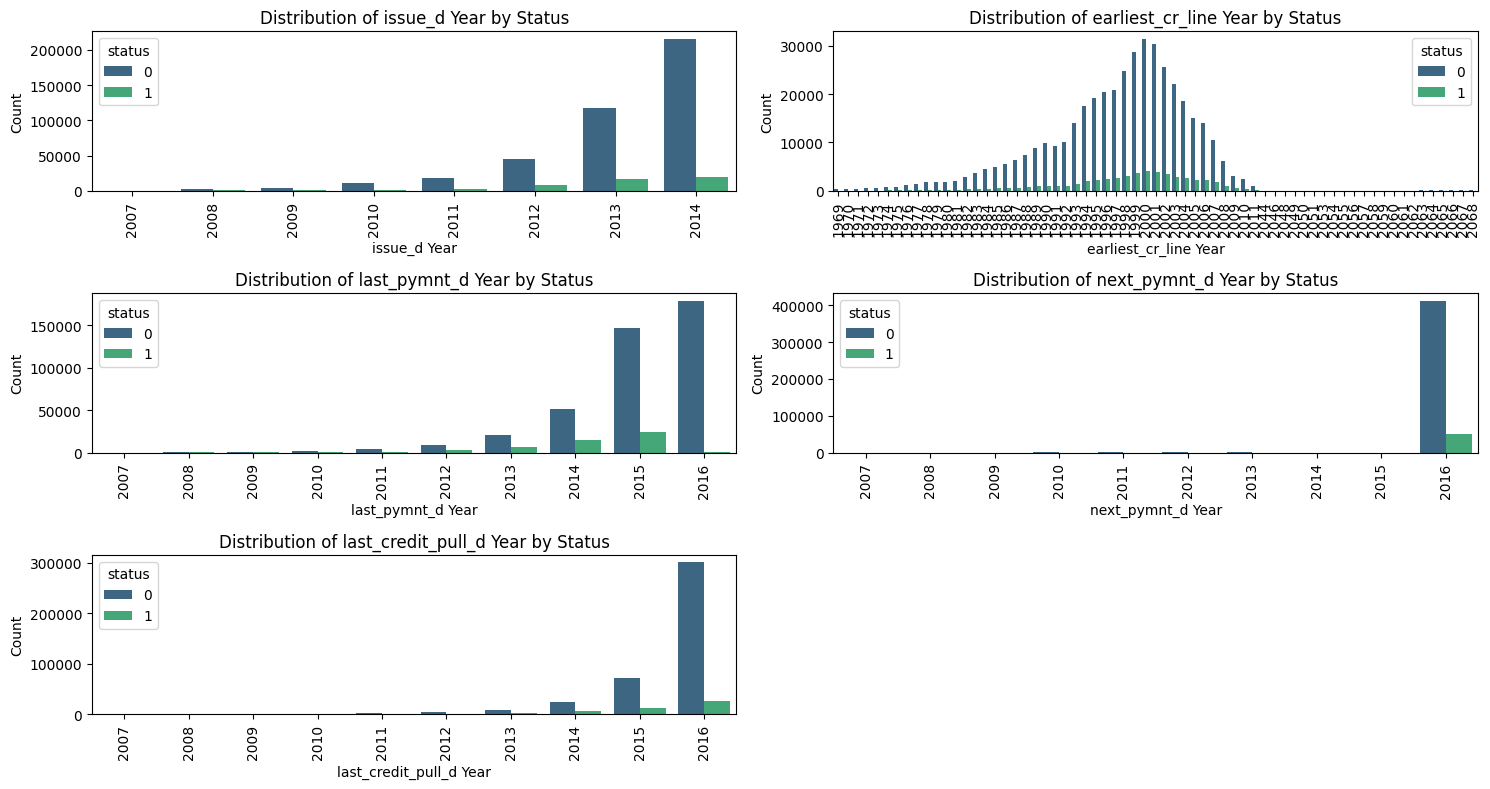

In [28]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(date_cols):
    plt.subplot(3, 2, i + 1)
    df_temp = df.copy()
    df_temp[col + '_year'] = df_temp[col].dt.year

    sns.countplot(x=col + '_year', hue='status', data=df_temp, palette='viridis')
    plt.xlabel(col + ' Year')
    plt.ylabel('Count')
    plt.title(f'Distribution of {col} Year by Status')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


Hampir setiap tahunnya terjadi peningkatan status GOOD dan BAD dengan mayoritas berisi kelas GOOD

##### **e. Multivariate Analysis**

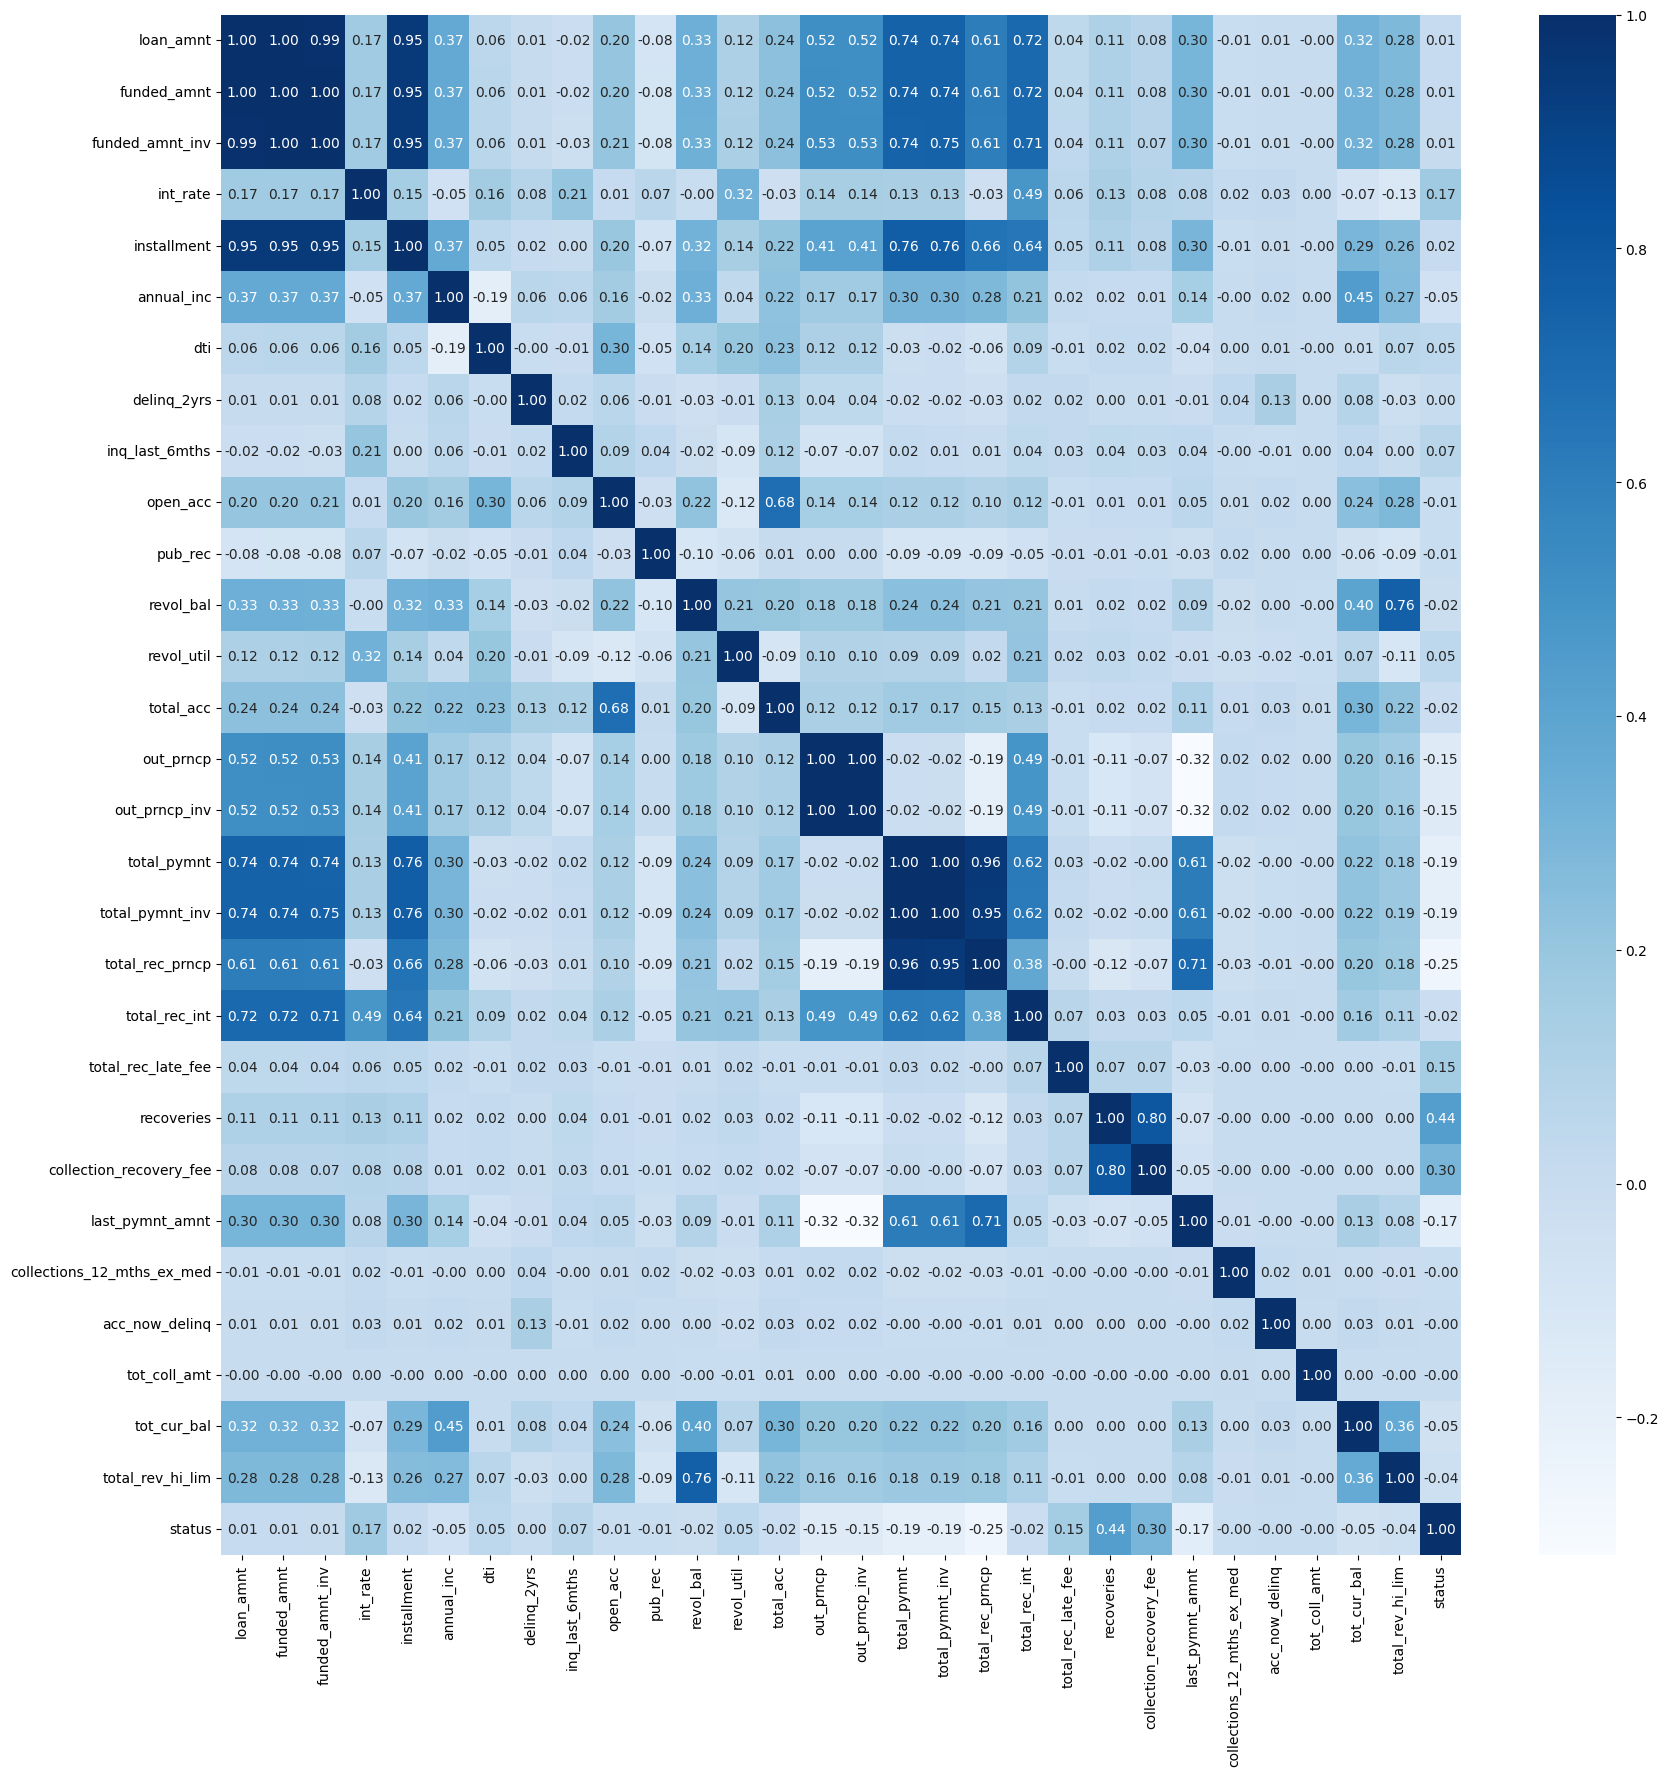

In [29]:
# Hitung matriks korelasi
correlation_matrix = df[numerical_cols].corr()

# Buat Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="Blues")
plt.show()

Berdasarkan correlation matrix terdapat beberapa fitur yang berkolerasi sangat tinggi di atas 0.9. Salah satu dari fitur yang berkolerasi tinggi ini akan dihapus nantinya untuk mengurarangi redundancy data.

## **3. Data Preparation**

#### **a. Feature Engineering**

In [34]:
# Mengambil fitur yang berkolerasi di atas 0.9
high_corr = correlation_matrix.where((correlation_matrix.abs() > 0.9) & (correlation_matrix.abs() < 1.0))

# Ubah menjadi stack dan drop NaN
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

print(high_corr_pairs)

           Feature1         Feature2  Correlation
0         loan_amnt      funded_amnt     0.998548
1         loan_amnt  funded_amnt_inv     0.994347
2         loan_amnt      installment     0.949666
3       funded_amnt        loan_amnt     0.998548
4       funded_amnt  funded_amnt_inv     0.996125
5       funded_amnt      installment     0.951787
6   funded_amnt_inv        loan_amnt     0.994347
7   funded_amnt_inv      funded_amnt     0.996125
8   funded_amnt_inv      installment     0.947387
9       installment        loan_amnt     0.949666
10      installment      funded_amnt     0.951787
11      installment  funded_amnt_inv     0.947387
12        out_prncp    out_prncp_inv     0.999998
13    out_prncp_inv        out_prncp     0.999998
14      total_pymnt  total_pymnt_inv     0.995862
15      total_pymnt  total_rec_prncp     0.956658
16  total_pymnt_inv      total_pymnt     0.995862
17  total_pymnt_inv  total_rec_prncp     0.952158
18  total_rec_prncp      total_pymnt     0.956658


In [35]:
# Menghapus kolom yang tidak digunakan pada pembuatan model
# Menghapus kolom yang memiliki korelasi sangat tinggi (salah satunya saja)
df.drop(columns=['collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'pymnt_plan', 'funded_amnt_inv', 
                 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp'],inplace=True)

In [36]:
# Melakukan mapping untuk data-data ordinal
mappings = {
    'emp_length': {
        "< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4,
        "5 years": 5, "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10
    },
    'grade': {
        "A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6
    },
    'verification_status': {
        "Not Verified": 0, "Source Verified": 1, "Verified": 2
    }
}

for col, mapping in mappings.items():
    df[col] = df[col].map(mapping).astype(int)

df[['emp_length', 'grade', 'verification_status']]

,emp_length,grade,verification_status
0,10,1,2
1,0,2,1
2,10,2,0
3,10,2,1
4,1,1,1
...,...,...,...
466280,4,2,1
466281,10,3,2
466282,7,3,2
466283,3,0,2


##### **b. Outlier Handling**

In [37]:
# Membagi kolom menjadi fitur kategorikal dan numerikal yang nantinya akan dilatih nantinya
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['number']).drop(columns=['status']).columns

numerical_features

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'grade', 'emp_length',
       'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [55]:
# Menangani outliers untuk setiap kolom numerik dengan mengganti outliers dengan median
for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    median = df[column].median()
    
    # Mengganti nilai outlier dengan median
    df[column] = df[column].apply(
        lambda x: median if x < (Q1 - 1.5 * IQR) or x > (Q3 + 1.5 * IQR) else x
    )

print("Data setelah menangani outliers:")
df.describe()

Data setelah menangani outliers:


,loan_amnt,funded_amnt,int_rate,grade,emp_length,annual_inc,verification_status,issue_d,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,status
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.0,...,466285.0,466285.0,466285.0,466285,466285.000000,466285,466285,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,13.655512,1.817095,6.173846,64381.733134,1.042502,2013-08-23 15:33:29.494623232,17.216629,0.0,...,0.0,0.0,0.0,2015-04-23 09:59:20.269792768,471.079629,2016-01-20 10:35:56.379038208,2015-08-30 17:12:25.956657152,99462.908972,22039.462048,0.111919
min,500.000000,500.000000,5.420000,0.000000,0.000000,1896.000000,0.000000,2007-06-01 00:00:00,0.000000,0.0,...,0.0,0.0,0.0,2007-12-01 00:00:00,0.000000,2007-12-01 00:00:00,2007-05-01 00:00:00,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,10.990000,1.000000,3.000000,45000.000000,0.000000,2013-03-01 00:00:00,11.360000,0.0,...,0.0,0.0,0.0,2015-01-01 00:00:00,312.620000,2016-02-01 00:00:00,2015-11-01 00:00:00,33611.000000,15000.000000,0.000000
50%,12000.000000,12000.000000,13.660000,2.000000,7.000000,63000.000000,1.000000,2014-01-01 00:00:00,16.870000,0.0,...,0.0,0.0,0.0,2015-12-01 00:00:00,545.960000,2016-02-01 00:00:00,2016-01-01 00:00:00,81539.000000,22800.000000,0.000000
75%,20000.000000,20000.000000,16.290000,3.000000,10.000000,80000.000000,2.000000,2014-07-01 00:00:00,22.780000,0.0,...,0.0,0.0,0.0,2016-01-01 00:00:00,545.960000,2016-02-01 00:00:00,2016-01-01 00:00:00,141198.000000,25600.000000,0.000000
max,35000.000000,35000.000000,24.200000,6.000000,10.000000,137500.000000,2.000000,2014-12-01 00:00:00,39.910000,0.0,...,0.0,0.0,0.0,2016-01-01 00:00:00,1307.520000,2016-03-01 00:00:00,2016-01-01 00:00:00,346937.000000,49740.000000,1.000000
std,8286.509164,8274.371300,4.124039,1.320385,3.640525,25904.066250,0.822507,NaN,7.848085,0.0,...,0.0,0.0,0.0,NaN,221.974008,NaN,NaN,83373.806142,10035.303362,0.315267


#### **c. Encoding Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Melakukan encoding untuk mengubah data kategorikal menjadi numerikal 
label_encoder = LabelEncoder()
df_encoding = df.copy()
 
for col in categorical_features:
    df_encoding[col] = label_encoder.fit_transform(df[col])
 
df_encoding

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,status
0,5000,5000,0,10.65,1,6,10,5,24000.0,2,...,0.0,0.0,0.0,2015-01-01,171.62,2016-02-01,2016-01-01,81539.0,22800.0,0
1,2500,2500,1,15.27,2,13,0,5,30000.0,1,...,0.0,0.0,0.0,2013-04-01,119.66,2016-02-01,2013-09-01,81539.0,22800.0,1
2,2400,2400,0,15.96,2,14,10,5,12252.0,0,...,0.0,0.0,0.0,2014-06-01,649.91,2016-02-01,2016-01-01,81539.0,22800.0,0
3,10000,10000,0,13.49,2,10,10,5,49200.0,1,...,0.0,0.0,0.0,2015-01-01,357.48,2016-02-01,2015-01-01,81539.0,22800.0,0
4,3000,3000,1,12.69,1,9,1,5,80000.0,1,...,0.0,0.0,0.0,2016-01-01,67.79,2016-02-01,2016-01-01,81539.0,22800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,1,14.47,2,11,4,1,110000.0,1,...,0.0,0.0,0.0,2016-01-01,432.64,2016-02-01,2016-01-01,294998.0,29900.0,0
466281,22000,22000,1,19.97,3,19,10,1,78000.0,2,...,0.0,0.0,0.0,2014-12-01,17.50,2016-02-01,2016-01-01,221830.0,39400.0,1
466282,20700,20700,1,16.99,3,15,7,1,46000.0,2,...,0.0,0.0,0.0,2016-01-01,514.34,2016-02-01,2015-12-01,73598.0,13100.0,0
466283,2000,2000,0,7.90,0,3,3,4,83000.0,2,...,0.0,0.0,0.0,2014-12-01,1500.68,2016-02-01,2015-04-01,81539.0,53100.0,0


#### **e. Scalling Data**

In [40]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numerik
scaler = StandardScaler()
df_normalized = df_encoding.copy()
df_normalized[numerical_features] = scaler.fit_transform(df_encoding[numerical_features])

print(df_normalized)

        loan_amnt  funded_amnt  term  int_rate     grade  sub_grade  \
0       -1.124392    -1.122963     0 -0.729386 -0.618831          6   
1       -1.426088    -1.425101     1  0.373724  0.138524         13   
2       -1.438156    -1.437186     0  0.538474  0.138524         14   
3       -0.521001    -0.518687     0 -0.051284  0.138524         10   
4       -1.365749    -1.364673     1 -0.242298 -0.618831          9   
...           ...          ...   ...       ...       ...        ...   
466280   0.492696     0.496497     1  0.182709  0.138524         11   
466281   0.927137     0.931576     1  1.495935  0.895880         19   
466282   0.770256     0.774464     1  0.784405  0.895880         15   
466283  -1.486427    -1.485528     0 -1.385999 -1.376187          3   
466284  -0.521001    -0.518687     0  1.312083  0.895880         17   

        emp_length  home_ownership  annual_inc  verification_status  ...  \
0         1.050991               5   -1.476455             1.164122  ..

##### **f. Splitting Data**

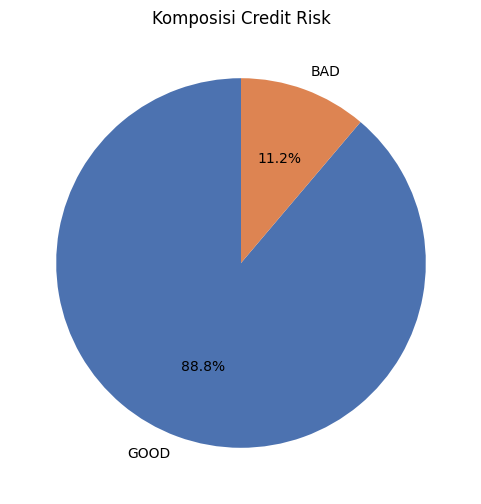

In [41]:
# Melihat distribusi kelas target 'status'
pallete = sns.color_palette('deep')

plt.figure(figsize=(6,6))
plt.pie(df['status'].value_counts(), 
        labels=['GOOD', 'BAD'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=pallete)
plt.title('Komposisi Credit Risk')

plt.show()

Dapat dilihat di atas kelas target yaitu 'status' antara GOOD dan BAD tidak seimbang perbandingannya maka dari itu akan dilakukan Handling Imbalance Data pada data training menggunakan SMOTE dengan cara melakukna oversampling pada kelas minority.

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_normalized.drop('status', axis=1)

X = X.select_dtypes(exclude=['datetime64']) 
y = df_normalized['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Distribusi sebelum SMOTE:", Counter(y_train))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:", Counter(y_train_resampled))

Distribusi sebelum SMOTE: Counter({0: 331279, 1: 41749})
Distribusi setelah SMOTE: Counter({0: 331279, 1: 331279})


## **5. Data Modelling**

In [43]:
# Import dan definisikan model yang akan digunakan
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xg = XGBClassifier(random_state=42)

#### **a. Logistic Regression**

In [44]:
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)

#### **b. Decision Tree**

In [45]:
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test)

#### **c. Random Forest**

In [46]:
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf= rf.predict(X_test)

#### **d. XGBoost** 

In [47]:
xg.fit(X_train_resampled, y_train_resampled)
y_pred_xg= xg.predict(X_test)

#### **e. Accuration Score**

In [48]:
from sklearn.metrics import accuracy_score

print("Akurasi Logistic Regression :", accuracy_score(y_test, y_pred_lr))
print("Akurasi Decision Tree :", accuracy_score(y_test, y_pred_dt))
print("Akurasi Random Forest :", accuracy_score(y_test, y_pred_rf))
print("Akurasi XGBoost :", accuracy_score(y_test, y_pred_xg))

Akurasi Logistic Regression : 0.7918547669343856
Akurasi Decision Tree : 0.9473712429093795
Akurasi Random Forest : 0.978478827326635
Akurasi XGBoost : 0.9798835476157286


#### **GridSearch XGBoost**

Berdasarkan 4 model yang dilatih di atas XGBoost memiliki akurasi paling tinggi. Maka dilakukan GridSearch dari model tersebut sebagai usaha untuk mencari hyperparameter terbaik dari model tersebut.

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Parameter Grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-3
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Parameter terbaik GridSearch
print("Parameter terbaik:", grid_search.best_params_)
print("Skor Terbaik:", grid_search.best_score_)

best_model_xg = grid_search.best_estimator_
y_pred_gs_xg = best_model_xg.predict(X_test)
print("Akurasi pada data test:", accuracy_score(y_test, y_pred_gs_xg))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Parameter terbaik: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}
Skor Terbaik: 0.9798010334450735
Akurasi pada data test: 0.9791222106651511


Sejauh hasil GridSearch yang dilakukan, parameter terbaik dari model XGboost untuk dataset ini yaitu dengan 'learning_rate': 0.2, 'max_depth': 6, dan'n_estimators': 100.

## **4. Evaluation**

#### **a. Confusion Matrix**

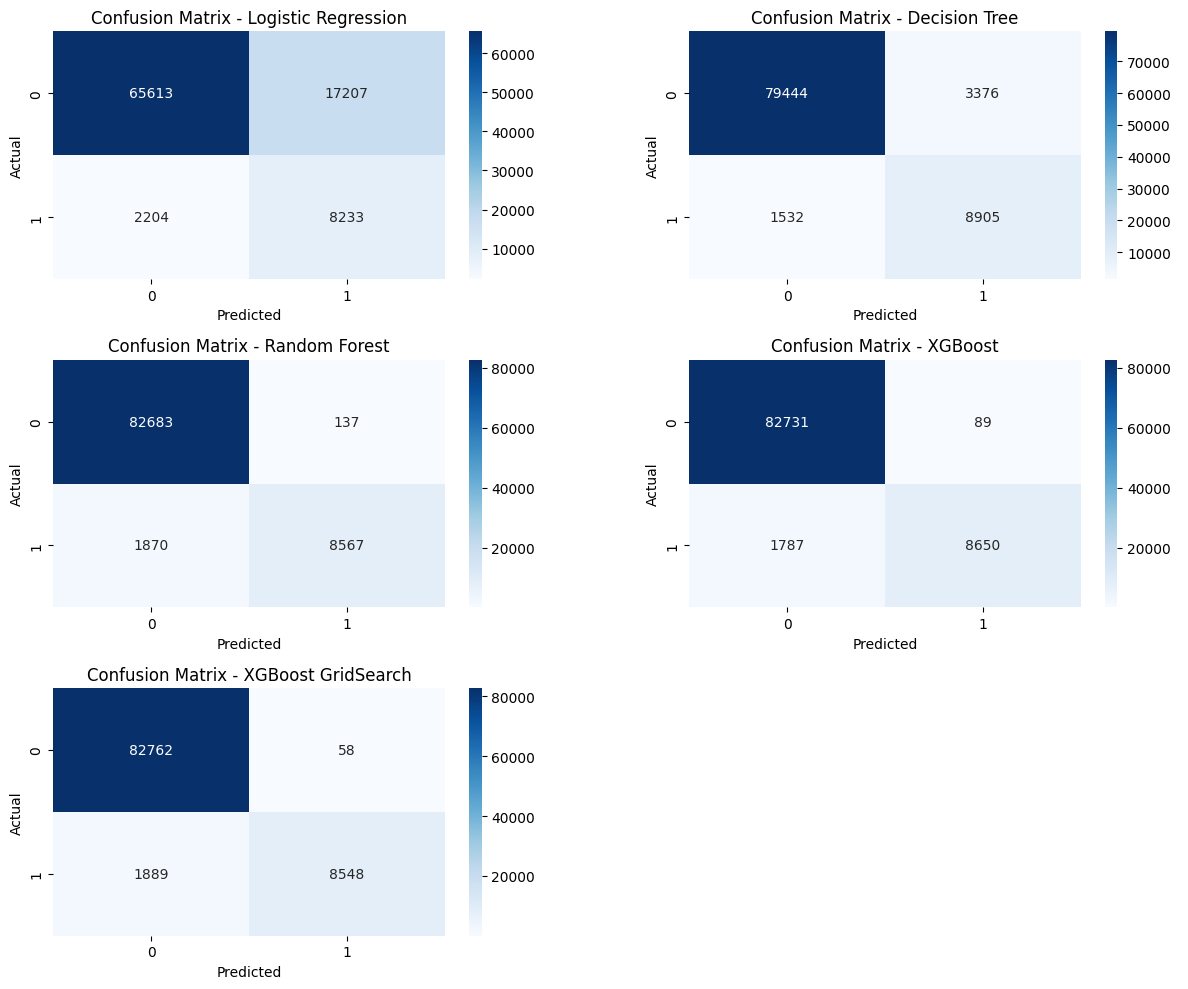

In [50]:
from sklearn.metrics import confusion_matrix

# Daftar prediksi dan label model
model_preds = [
    (y_pred_lr, "Logistic Regression"),
    (y_pred_dt, "Decision Tree"),
    (y_pred_rf, "Random Forest"),
    (y_pred_xg, "XGBoost"),
    (y_pred_gs_xg, "XGBoost GridSearch")
]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (y_pred, title) in enumerate(model_preds):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {title}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

if len(model_preds) < len(axes):
    axes[-1].axis('off')


plt.tight_layout()
plt.subplots_adjust(wspace=0.3) 
plt.show()

#### **b. Evaluation Metrics**

In [51]:
from sklearn.metrics import classification_report

print("Evaluation metrics Logsitic Regression")
print(classification_report(y_test, y_pred_lr))

print("\nEvaluation metrics Decision Tree")
print(classification_report(y_test, y_pred_dt))

print("\nEvaluation metrics Random Forest")
print(classification_report(y_test, y_pred_rf))

print("\nEvaluation metrics XGBoost")
print(classification_report(y_test, y_pred_xg))

print("\nEvaluation metrics XGBoost - Grid Search")
print(classification_report(y_test, y_pred_gs_xg))

Evaluation metrics Logsitic Regression
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     82820
           1       0.32      0.79      0.46     10437

    accuracy                           0.79     93257
   macro avg       0.65      0.79      0.67     93257
weighted avg       0.90      0.79      0.83     93257


Evaluation metrics Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     82820
           1       0.73      0.85      0.78     10437

    accuracy                           0.95     93257
   macro avg       0.85      0.91      0.88     93257
weighted avg       0.95      0.95      0.95     93257


Evaluation metrics Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     82820
           1       0.98      0.82      0.90     10437

    accuracy                           0.98     93257
   macro avg       0.

#### **c. ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test_roc, y_test_roc, model_name="Model", show=False):
    """
    Menampilkan ROC Curve dari setiap model.
    
    Parameters:
    - model: objek model yang sudah dilatih
    - X_test_roc: fitur data uji
    - y_test_roc: label asli data uji
    - model_name: nama model untuk label di plot
    """
    # Prediksi probabilitas kelas positif (kelas 1)
    y_prob = model.predict_proba(X_test_roc)[:, 1]

    # Hitung ROC dan AUC
    fpr, tpr, _ = roc_curve(y_test_roc, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

    if show:
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve Comparison')
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()



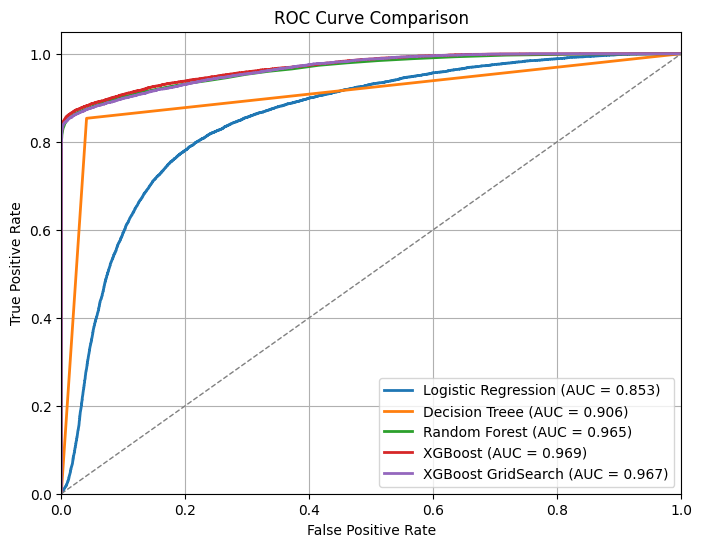

In [54]:
# Plot ROC Curve dari setiap model
plt.figure(figsize=(8, 6))

plot_roc_curve(lr, X_test, y_test, model_name="Logistic Regression")
plot_roc_curve(dt, X_test, y_test, model_name="Decision Treee")
plot_roc_curve(rf, X_test, y_test, model_name="Random Forest")
plot_roc_curve(xg, X_test, y_test, model_name="XGBoost")
plot_roc_curve(best_model_xg, X_test, y_test, model_name="XGBoost GridSearch", show=True)

# **Conclusion**
Dari keempat model klasifikasi yang diuji, yaitu Logistic Regression, Decision Tree, Random Forest, dan XGBoost, model XGBoost menunjukkan performa terbaik dibandingkan model lainnya. Hal ini terlihat dari hasil Confusion Matrix dan evaluasi metrik yang menunjukkan bahwa XGBoost memiliki tingkat kesalahan klasifikasi paling rendah serta nilai metrik yang paling tinggi. Meskipun penerapan GridSearch belum berhasil meningkatkan akurasi secara signifikan, masih terdapat peluang untuk mengoptimalkan performa model XGBoost dengan menambahkan atau menyesuaikan parameter lain dalam proses tuning. Oleh karena itu, model XGBoost merupakan pilihan yang paling direkomendasikan untuk melakukan klasifikasi risiko kredit.

# **Business Recomendation**

Menerapkan model XGBoost sebagai model utama dalam sistem klasifikasi risiko kredit karena memiliki akurasi dan F1-score tertinggi dibandingkan model lainnya. Keunggulan ini menjadikannya alat yang andal dalam mengidentifikasi nasabah berisiko tinggi secara lebih akurat.

Model XGBoost juga dapat diintegrasikan ke dalam sistem evaluasi pengajuan pinjaman untuk mempercepat proses pengambilan keputusan. Sebagai contoh, jika model memprediksi risiko kredit = "Bad", sistem dapat langsung memberikan notifikasi ke tim analis untuk verifikasi manual atau permintaan jaminan tambahan sebelum keputusan akhir dibuat.